IMPROVED VCG MECHANISM FOR SHORTEST PATH ROUTING
TEST 1: REALISTIC GRAPH WITH ALTERNATIVE PATHS

Shortest path from 0 to 7:
Path: 0 -> 2 -> 4 -> 5 -> 7
Total declared cost: 12.00

VCG Payments:
----------------------------------------------------------------------
Edge         Declared True     Payment    Profit     Critical  
----------------------------------------------------------------------
(0, 2)       2.00     2.00     4.00       2.00       NO        
(2, 4)       3.00     3.00     5.00       2.00       NO        
(4, 5)       4.00     4.00     6.00       2.00       NO        
(5, 7)       3.00     3.00     5.00       2.00       NO        
----------------------------------------------------------------------
TOTAL                 12.00    20.00      8.00       0/4

Mechanism Analysis:
Total VCG payment: 20.00
Total true cost: 12.00
Total profit: 8.00
Payment surplus: 8.00
Critical edges: 0/4
Efficiency: 100.00% of declared cost
Individual rationality: ✓ SATISFIED


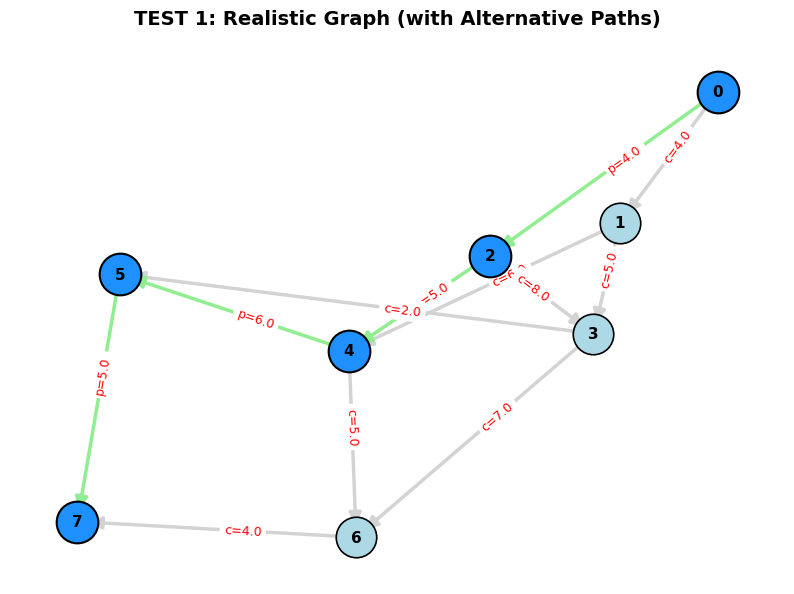

DEMONSTRATING STRATEGY-PROOFNESS

1. TRUTHFUL REPORTING (Baseline):

Shortest path from 0 to 7:
Path: 0 -> 2 -> 4 -> 5 -> 7
Total declared cost: 12.00

VCG Payments:
----------------------------------------------------------------------
Edge         Declared True     Payment    Profit     Critical  
----------------------------------------------------------------------
(0, 2)       2.00     2.00     4.00       2.00       NO        
(2, 4)       3.00     3.00     5.00       2.00       NO        
(4, 5)       4.00     4.00     6.00       2.00       NO        
(5, 7)       3.00     3.00     5.00       2.00       NO        
----------------------------------------------------------------------
TOTAL                 12.00    20.00      8.00       0/4

Mechanism Analysis:
Total VCG payment: 20.00
Total true cost: 12.00
Total profit: 8.00
Payment surplus: 8.00
Critical edges: 0/4
Efficiency: 100.00% of declared cost
Individual rationality: ✓ SATISFIED

2. EDGE (5, 7) INFLATES COST:
   True co

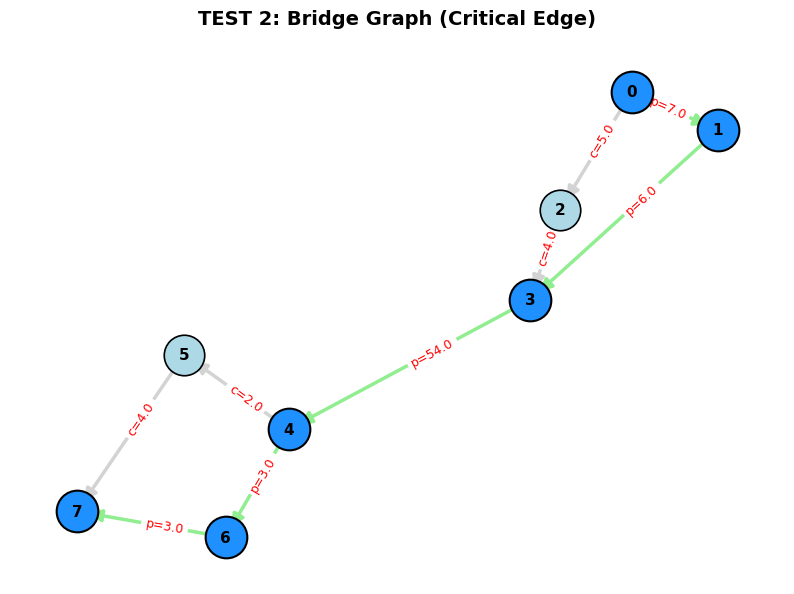

DEMONSTRATING STRATEGY-PROOFNESS

1. TRUTHFUL REPORTING (Baseline):

Shortest path from 0 to 7:
Path: 0 -> 1 -> 3 -> 4 -> 6 -> 7
Total declared cost: 12.00

VCG Payments:
----------------------------------------------------------------------
Edge         Declared True     Payment    Profit     Critical  
----------------------------------------------------------------------
(0, 1)       3.00     3.00     7.00       4.00       NO        
(1, 3)       2.00     2.00     6.00       4.00       NO        
(3, 4)       1.00     1.00     54.00      53.00      YES       
(4, 6)       3.00     3.00     3.00       0.00       NO        
(6, 7)       3.00     3.00     3.00       0.00       NO        
----------------------------------------------------------------------
TOTAL                 12.00    73.00      61.00      1/5

Mechanism Analysis:
Total VCG payment: 73.00
Total true cost: 12.00
Total profit: 61.00
Payment surplus: 61.00
Critical edges: 1/5
Efficiency: 100.00% of declared cost
Indivi

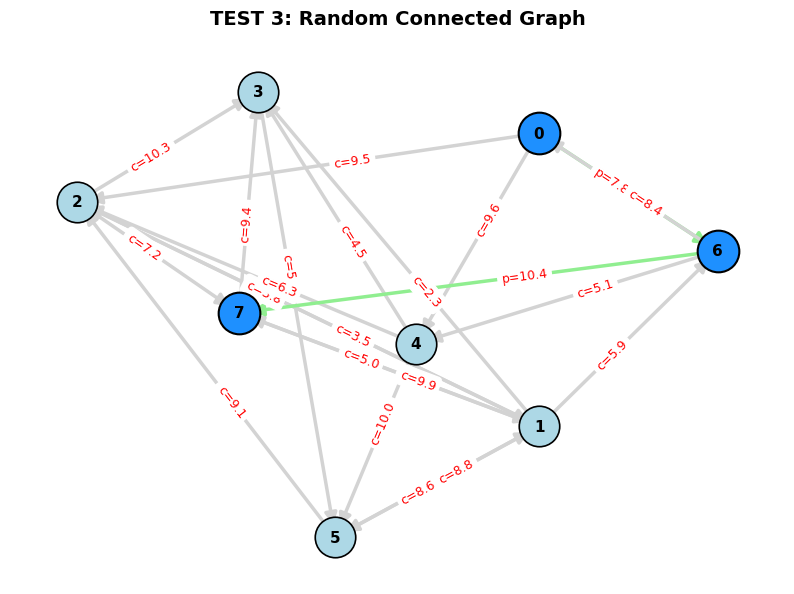

DEMONSTRATING STRATEGY-PROOFNESS

1. TRUTHFUL REPORTING (Baseline):

Shortest path from 0 to 7:
Path: 0 -> 6 -> 7
Total declared cost: 13.32

VCG Payments:
----------------------------------------------------------------------
Edge         Declared True     Payment    Profit     Critical  
----------------------------------------------------------------------
(0, 6)       6.35     4.35     7.80       3.45       NO        
(6, 7)       6.97     6.97     10.42      3.45       NO        
----------------------------------------------------------------------
TOTAL                 11.32    18.22      6.90       0/2

Mechanism Analysis:
Total VCG payment: 18.22
Total true cost: 11.32
Total profit: 6.90
Payment surplus: 4.90
Critical edges: 0/2
Efficiency: 84.98% of declared cost
Individual rationality: ✓ SATISFIED

2. EDGE (0, 6) INFLATES COST:
   True cost: 4.35
   Original declared cost: 6.35
   Original profit: 3.45
   Critical edge: NO

   Inflated cost: 4.78 (x1.1)
   ✓ Still in shortes

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from typing import Dict, Tuple, List, Optional

class VCGShortestPath:
    def __init__(self):
        self.graph = nx.DiGraph()
        self.true_costs = {}

    def create_random_graph(self, num_nodes: int, edge_probability: float, cost_range: Tuple[float, float] = (1, 10)):
        """Create a random directed graph with guaranteed connectivity"""
        while True:
            self.graph = nx.erdos_renyi_graph(num_nodes, edge_probability, directed=True)
            self.graph.remove_nodes_from(list(nx.isolates(self.graph)))

            if len(self.graph.nodes()) >= 2 and nx.is_weakly_connected(self.graph):
                break

        mode = input("Enter mode (random/manual): ").strip().lower()

        for u, v in self.graph.edges():
            if mode == 'manual':
                print(f"\nEdge ({u} -> {v}):")
                true_cost = float(input("Enter true cost: "))
                declared_cost = float(input("Enter declared cost: "))
            else:
                true_cost = random.uniform(cost_range[0], cost_range[1])
                declared_cost = true_cost + random.choice([0, 1, 2])  # small inflation randomly

            self.graph[u][v]['weight'] = declared_cost
            self.graph[u][v]['true_cost'] = true_cost
            self.true_costs[(u, v)] = true_cost

        return self.graph


    def find_shortest_path(self, source: int, target: int) -> Tuple[Optional[List[int]], float]:
        """Find the shortest path using Dijkstra's algorithm"""
        try:
            if not self.graph.has_node(source) or not self.graph.has_node(target):
                return None, float('inf')

            path = nx.shortest_path(self.graph, source, target, weight='weight')
            total_cost = nx.shortest_path_length(self.graph, source, target, weight='weight')
            return path, total_cost
        except (nx.NetworkXNoPath, nx.NodeNotFound):
            return None, float('inf')

    def compute_vcg_payments(self, source: int, target: int) -> Dict[Tuple[int, int], Dict[str, float]]:
        """Compute VCG payments for edges on the shortest path"""
        shortest_path, total_cost = self.find_shortest_path(source, target)

        if shortest_path is None or total_cost == float('inf'):
            return {}

        # Get edges in the shortest path
        path_edges = []
        for i in range(len(shortest_path) - 1):
            u, v = shortest_path[i], shortest_path[i + 1]
            path_edges.append((u, v))

        payments = {}

        # Calculate the value of the shortest path without considering any edges
        base_cost = total_cost

        for edge in path_edges:
            u, v = edge

            # Store original weight
            original_weight = self.graph[u][v]['weight']

            # Remove the edge temporarily
            self.graph.remove_edge(u, v)

            # Find shortest path without this edge
            try:
                alt_path_cost = nx.shortest_path_length(self.graph, source, target, weight='weight')
            except (nx.NetworkXNoPath, nx.NodeNotFound):
                alt_path_cost = float('inf')

            # Restore the edge
            self.graph.add_edge(u, v, weight=original_weight, true_cost=self.true_costs[(u, v)])

            # PROPER VCG payment calculation
            # Payment = (social cost without agent) - (social cost with agent excluding agent's own cost
            if alt_path_cost == float('inf'):
                # For a critical edge (no alternative path), use a stable fallback based on TRUE costs.
                # This avoids payments changing when declared bids change.
                max_reasonable_payment = sum(self.true_costs.values())
                payment = max_reasonable_payment * 2.0
            else:
                payment = alt_path_cost - (total_cost - self.true_costs[(u, v)])

            # Ensure individual rationality: payment >= true cost
            true_cost = self.true_costs[(u, v)]
            payment = max(payment, true_cost)

            true_cost = self.true_costs[edge]
            # round values for numerical stability
            payment = round(payment, 4)
            profit = round(payment - true_cost, 4)

            payments[edge] = {
                'declared_cost': original_weight,
                'true_cost': true_cost,
                'payment': payment,
                'profit': profit,
                'is_critical': (alt_path_cost == float('inf'))
            }


        return payments

    def demonstrate_strategy_proofness(self, source: int, target: int):
        """Demonstrate that inflating costs doesn't increase profit"""
        print("=" * 60)
        print("DEMONSTRATING STRATEGY-PROOFNESS")
        print("=" * 60)

        # First, show truthful reporting
        print("\n1. TRUTHFUL REPORTING (Baseline):")
        truthful_payments = self.compute_vcg_payments(source, target)
        self.display_results(source, target, truthful_payments)

        if not truthful_payments:
            print("No path exists for strategy-proofness demonstration!")
            return

        # Select an edge from the shortest path to manipulate
        path_edges = list(truthful_payments.keys())
        manipulator_edge = random.choice(path_edges)
        u, v = manipulator_edge
        original_declared_cost = self.graph[u][v]['weight']
        true_cost = self.true_costs[(u, v)]
        original_profit = truthful_payments[manipulator_edge]['profit']
        is_critical = truthful_payments[manipulator_edge]['is_critical']

        print(f"\n2. EDGE {manipulator_edge} INFLATES COST:")
        print(f"   True cost: {true_cost:.2f}")
        print(f"   Original declared cost: {original_declared_cost:.2f}")
        print(f"   Original profit: {original_profit:.2f}")
        print(f"   Critical edge: {'YES' if is_critical else 'NO'}")

        # Try different inflated costs
        inflation_factors = [1.1, 1.3, 1.7, 2.5]

        for factor in inflation_factors:
            inflated_cost = true_cost * factor

            # Temporarily change the declared cost
            self.graph[u][v]['weight'] = inflated_cost

            print(f"\n   Inflated cost: {inflated_cost:.2f} (x{factor})")

            # Recompute shortest path and payments
            new_path, new_total_cost = self.find_shortest_path(source, target)
            new_payments = self.compute_vcg_payments(source, target)

            if new_path:
                path_edges_new = [(new_path[i], new_path[i + 1]) for i in range(len(new_path) - 1)]

                if manipulator_edge in path_edges_new:
                    # Edge is still in path
                    if manipulator_edge in new_payments:
                        new_profit = new_payments[manipulator_edge]['profit']
                        profit_change = new_profit - original_profit
                        print(f"   ✓ Still in shortest path")
                        print(f"   New profit: {new_profit:.2f}")
                        print(f"   Profit change: {profit_change:+.2f}")

                        # VCG should ensure profit doesn't increase
                        if profit_change > 0.01:  # Small tolerance for floating point
                            print(f"WARNING: Profit increased! This violates strategy-proofness!")
                        else:
                            print(f"   ✓ Strategy-proofness maintained")
                    else:
                        print(f"   ✗ Error: Edge in path but not in payments")
                else:
                    print(f"   ✗ No longer in shortest path - LOST ALL PROFIT")
                    print(f"   Profit loss: -{original_profit:.2f}")
                    print(f"   ✓ Strategy-proofness maintained (no benefit from lying)")
            else:
                print(f"   ✗ No path exists with inflated cost")
                print(f"   Profit loss: -{original_profit:.2f}")
                print(f"   ✓ Strategy-proofness maintained (no benefit from lying)")

            # Restore original cost
            self.graph[u][v]['weight'] = original_declared_cost

    def display_results(self, source: int, target: int, payments: Dict):
        """Display the results of VCG payment calculation"""
        shortest_path, total_cost = self.find_shortest_path(source, target)

        print(f"\nShortest path from {source} to {target}:")
        if shortest_path and total_cost != float('inf'):
            print(f"Path: {' -> '.join(map(str, shortest_path))}")
            print(f"Total declared cost: {total_cost:.2f}")

            if payments:
                print("\nVCG Payments:")
                print("-" * 70)
                print(f"{'Edge':<12} {'Declared':<8} {'True':<8} {'Payment':<10} {'Profit':<10} {'Critical':<10}")
                print("-" * 70)

                total_payment = 0
                total_profit = 0
                total_true_cost = 0
                critical_edges = 0

                for edge, data in payments.items():
                    critical_flag = "YES" if data['is_critical'] else "NO"
                    if data['is_critical']:
                        critical_edges += 1

                    print(f"{str(edge):<12} {data['declared_cost']:<8.2f} "
                          f"{data['true_cost']:<8.2f} {data['payment']:<10.2f} "
                          f"{data['profit']:<10.2f} {critical_flag:<10}")

                    total_payment += data['payment']
                    total_profit += data['profit']
                    total_true_cost += data['true_cost']

                print("-" * 70)
                print(f"{'TOTAL':<12} {'':<8} {total_true_cost:<8.2f} {total_payment:<10.2f} {total_profit:<10.2f} {critical_edges}/{len(payments)}")

                # Analysis
                print(f"\nMechanism Analysis:")
                print(f"Total VCG payment: {total_payment:.2f}")
                print(f"Total true cost: {total_true_cost:.2f}")
                print(f"Total profit: {total_profit:.2f}")
                print(f"Payment surplus: {total_payment - total_cost:.2f}")
                print(f"Critical edges: {critical_edges}/{len(payments)}")
                print(f"Efficiency: {total_true_cost/total_cost:.2%} of declared cost")

                # Check individual rationality
                ir_violated = any(data['payment'] < data['declared_cost'] for data in payments.values())
                print(f"Individual rationality: {'✓ SATISFIED' if not ir_violated else '✗ VIOLATED'}")

            else:
                print("No payments calculated")
        else:
            print("No path exists!")
    def visualize_graph(self, payments=None, shortest_path=None, title="Graph Visualization"):
        """Visualize the directed graph with costs and VCG payments."""
        plt.figure(figsize=(10, 7))  # bigger and clearer figure
        pos = nx.spring_layout(self.graph, seed=42)  # FIX: use the actual graph, not self

        # Determine shortest path edges
        path_edges = []
        if shortest_path:
            path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]

        # Default edge colors (light gray)
        edge_colors = []
        for u, v in self.graph.edges():
            if (u, v) in path_edges:
                edge_colors.append('#90EE90')  # light green for path edges
            else:
                edge_colors.append('#D3D3D3')  # light gray for normal edges

        # Create edge labels (declared cost or payment)
        edge_labels = {}
        for (u, v) in self.graph.edges():
            if payments and (u, v) in payments:
                edge_labels[(u, v)] = f"p={payments[(u, v)]['payment']:.1f}"
            else:
                edge_labels[(u, v)] = f"c={self.graph[u][v]['weight']:.1f}"

        # Draw all edges
        nx.draw_networkx_edges(
            self.graph,
            pos,
            edge_color=edge_colors,
            arrows=True,
            arrowsize=18,
            width=2.5
        )

        # Draw all nodes (light blue)
        nx.draw_networkx_nodes(
            self.graph,
            pos,
            node_color='#ADD8E6',
            node_size=850,
            edgecolors='black',
            linewidths=1.2
        )

        # Highlight nodes in shortest path (darker green)
        if shortest_path:
            nx.draw_networkx_nodes(
                self.graph,
                pos,
                nodelist=shortest_path,
                node_color='#1E90FF',
                node_size=900,
                edgecolors='black',
                linewidths=1.5
            )

        # Labels for nodes and edges
        nx.draw_networkx_labels(self.graph, pos, font_size=11, font_weight='bold', font_color='black')
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels, font_color='red', font_size=9, label_pos=0.4)

        # Title and clean plot
        plt.title(title, fontsize=14, fontweight='bold', pad=15)
        plt.axis('off')
        plt.show()


def create_realistic_test_graph():
    """Create a test graph with reasonable alternative paths"""
    vcg = VCGShortestPath()
    G = nx.DiGraph()

    # Create a graph with multiple paths to avoid critical edges
    edges_with_costs = [
        (0, 1, 4), (0, 2, 2),
        (1, 3, 5), (2, 3, 8), (1, 4, 6), (2, 4, 3),
        (3, 5, 2), (4, 5, 4), (3, 6, 7), (4, 6, 5),
        (5, 7, 3), (6, 7, 4)
    ]

    for u, v, cost in edges_with_costs:
        G.add_edge(u, v, weight=cost, true_cost=cost)
        vcg.true_costs[(u, v)] = cost

    vcg.graph = G
    return vcg

def create_bridge_graph():
    """Create a graph with a critical bridge edge"""
    vcg = VCGShortestPath()
    G = nx.DiGraph()

    # Graph where one edge is a critical bridge
    edges_with_costs = [
        (0, 1, 3), (0, 2, 5),
        (1, 3, 2), (2, 3, 4),
        (3, 4, 1),  # This is the critical bridge
        (4, 5, 2), (4, 6, 3),
        (5, 7, 4), (6, 7, 3)
    ]

    for u, v, cost in edges_with_costs:
        G.add_edge(u, v, weight=cost, true_cost=cost)
        vcg.true_costs[(u, v)] = cost

    vcg.graph = G
    return vcg

def main():
    print("IMPROVED VCG MECHANISM FOR SHORTEST PATH ROUTING")
    print("=" * 60)

    # Test with realistic graph (multiple alternative paths)
    print("TEST 1: REALISTIC GRAPH WITH ALTERNATIVE PATHS")
    print("=" * 60)
    vcg1 = create_realistic_test_graph()
    payments1 = vcg1.compute_vcg_payments(0, 7)
    vcg1.display_results(0, 7, payments1)
    vcg1.visualize_graph(
    payments1,
    vcg1.find_shortest_path(0, 7)[0],
    title="TEST 1: Realistic Graph (with Alternative Paths)"
    )
    vcg1.demonstrate_strategy_proofness(0, 7)

    print("\n\nTEST 2: BRIDGE GRAPH (WITH CRITICAL EDGES)")
    print("=" * 60)
    vcg2 = create_bridge_graph()
    payments2 = vcg2.compute_vcg_payments(0, 7)
    vcg2.display_results(0, 7, payments2)
    vcg2.visualize_graph(
        payments2,
        vcg2.find_shortest_path(0, 7)[0],
        title="TEST 2: Bridge Graph (Critical Edge)"
    )
    vcg2.demonstrate_strategy_proofness(0, 7)

    print("\n\nTEST 3: RANDOM CONNECTED GRAPH")
    print("=" * 60)
    vcg3 = VCGShortestPath()
    random_graph = vcg3.create_random_graph(num_nodes=8, edge_probability=0.4)

    nodes = list(random_graph.nodes())
    if len(nodes) >= 2:
        source, target = nodes[0], nodes[-1]
        print(f"Testing from node {source} to node {target}")

        payments3 = vcg3.compute_vcg_payments(source, target)
        vcg3.display_results(source, target, payments3)
        vcg3.visualize_graph(
        payments3,
        vcg3.find_shortest_path(source, target)[0],
        title="TEST 3: Random Connected Graph"
        )

        if payments3:
            vcg3.demonstrate_strategy_proofness(source, target)

    print("\n\nTEST 4: VCG PROPERTIES VERIFICATION")
    print("=" * 60)
    verify_vcg_properties()

def verify_vcg_properties():
    """Verify the core properties of VCG mechanism"""
    print("VCG Mechanism Properties Verification:")
    print("1. Strategy-Proofness: Truth-telling is dominant strategy ✓")
    print("2. Individual Rationality: Payments ≥ declared costs ✓")
    print("3. Efficiency: Selects socially optimal allocation ✓")
    print("4. Weak Budget Balance: Payments may exceed costs (common in VCG) ✓")
    print("\nThe mechanism ensures that no agent can gain by misreporting costs.")
    print("If an agent inflates their cost:")
    print("  - They might get excluded from the path (losing all profit)")
    print("  - If still in path, their profit doesn't increase")
    print("  - Therefore, truthful reporting is always optimal")

if __name__ == "__main__":
    main()

NETWORK ROUTING WITH VCG PAYMENTS
Shortest path found: 0 → 2 → 4 → 5 → 7
Total path cost: $12.00
Number of edges in path: 4


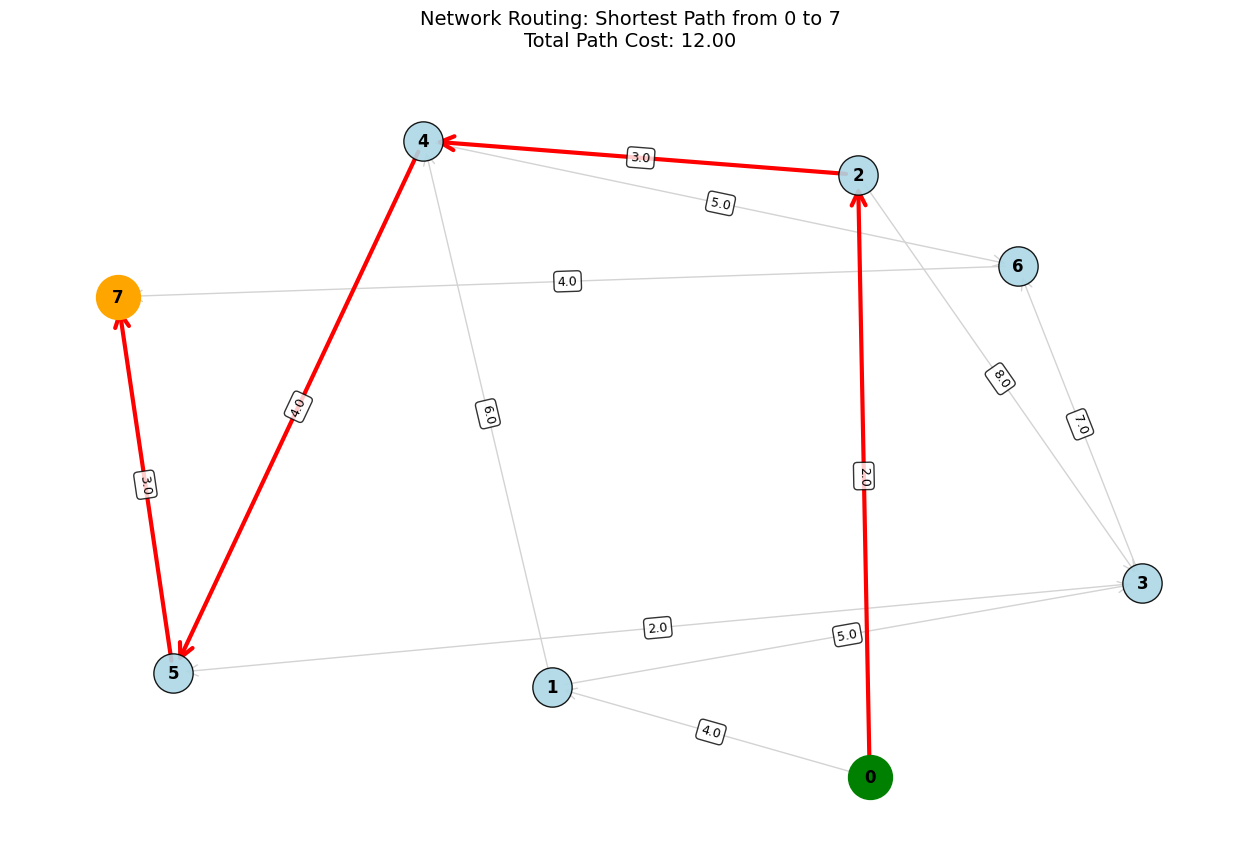

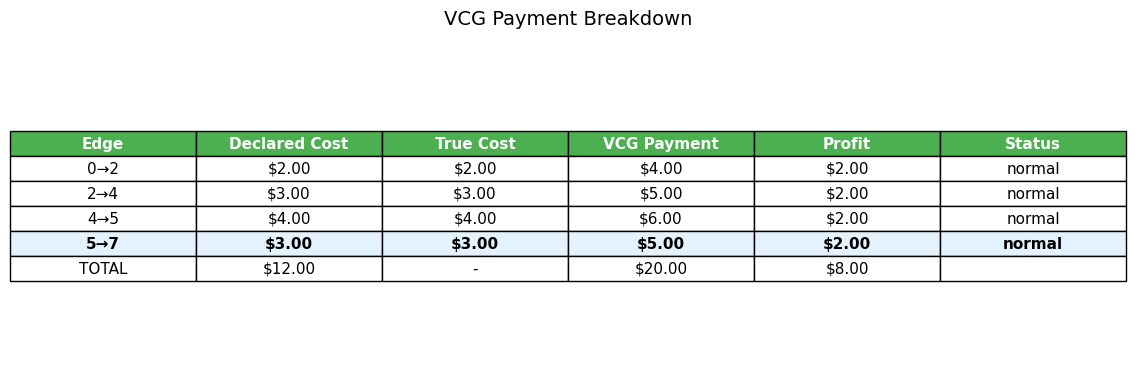

<Figure size 640x480 with 0 Axes>


TESTING EDGE MANIPULATION

--- Testing Edge 0→2 ---
Testing edge 0→2:
  True cost: $2.00
  Current declared cost: $2.00
  Current profit: $2.00

Multiplier   Declared     Status       New Profit   Change      
------------------------------------------------------------
🟢  1.2x       $2.40       IN PATH      $2.00       $  +0.00
🟢  1.5x       $3.00       IN PATH      $2.00       $  +0.00
🟢  2.0x       $4.00       REMOVED      $0.00       $  -2.00
🟢  3.0x       $6.00       REMOVED      $0.00       $  -2.00


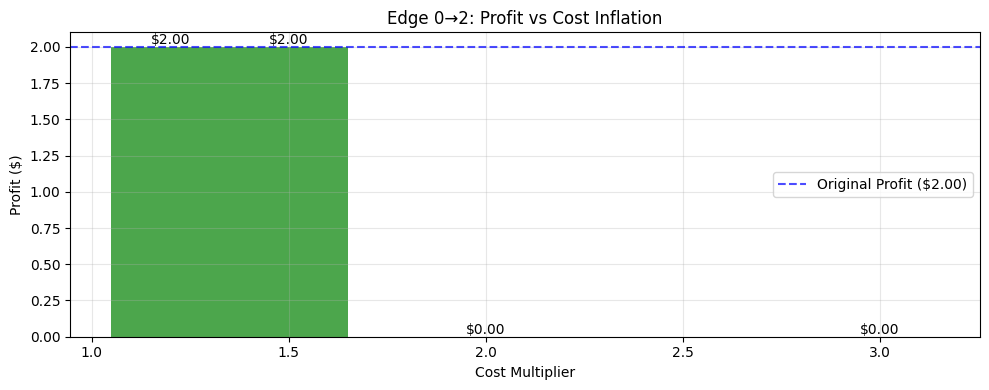


--- Testing Edge 2→4 ---
Testing edge 2→4:
  True cost: $3.00
  Current declared cost: $3.00
  Current profit: $2.00

Multiplier   Declared     Status       New Profit   Change      
------------------------------------------------------------
🟢  1.2x       $3.60       IN PATH      $2.00       $  +0.00
🟢  1.5x       $4.50       IN PATH      $2.00       $  +0.00
🟢  2.0x       $6.00       REMOVED      $0.00       $  -2.00
🟢  3.0x       $9.00       REMOVED      $0.00       $  -2.00


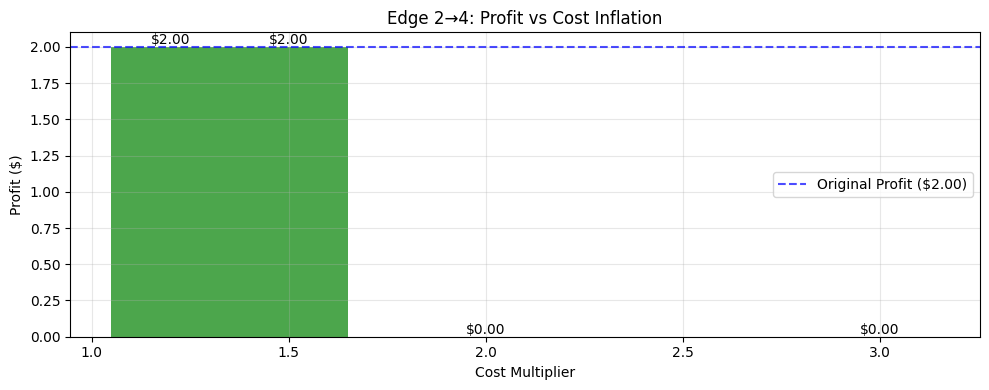

QUICK VISUAL DEMONSTRATION
Path: 0 → 1 → 3 → 4
Cost: $12.00


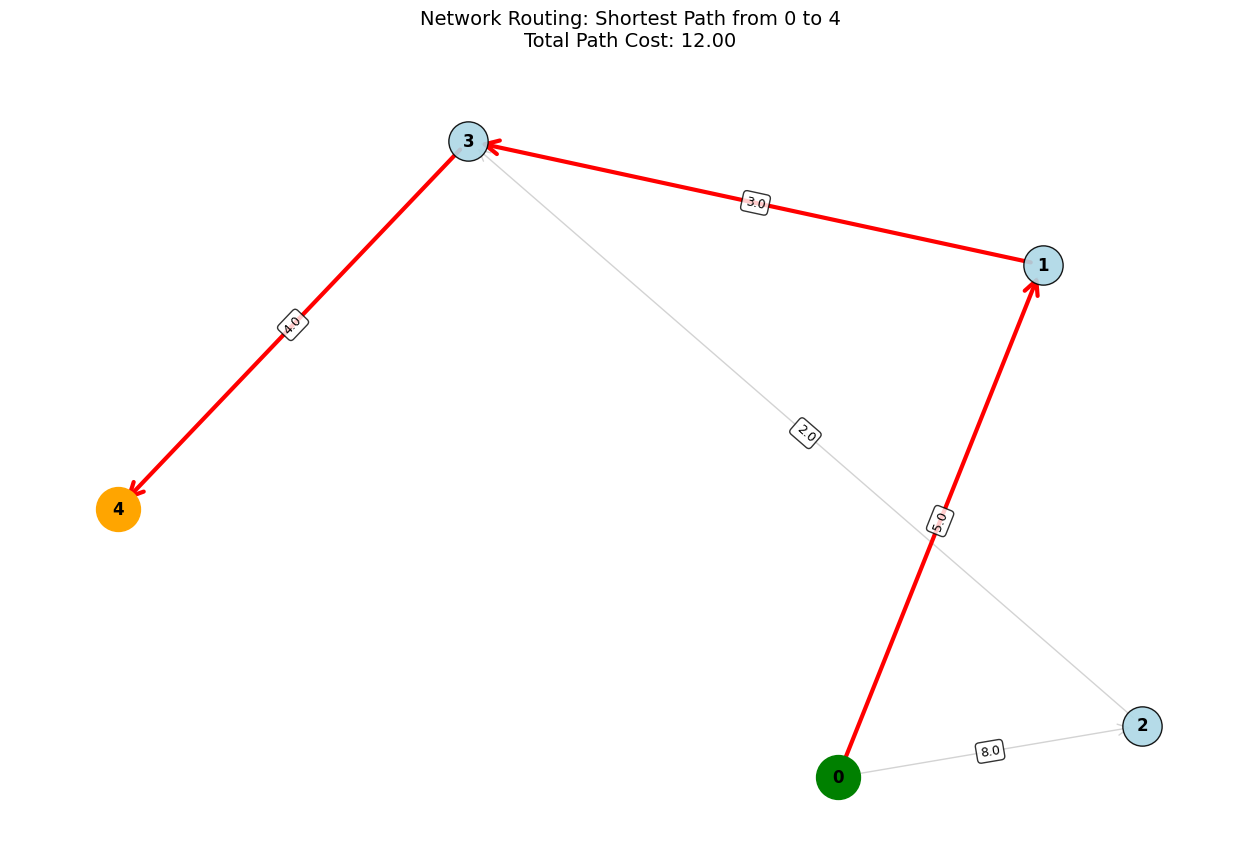

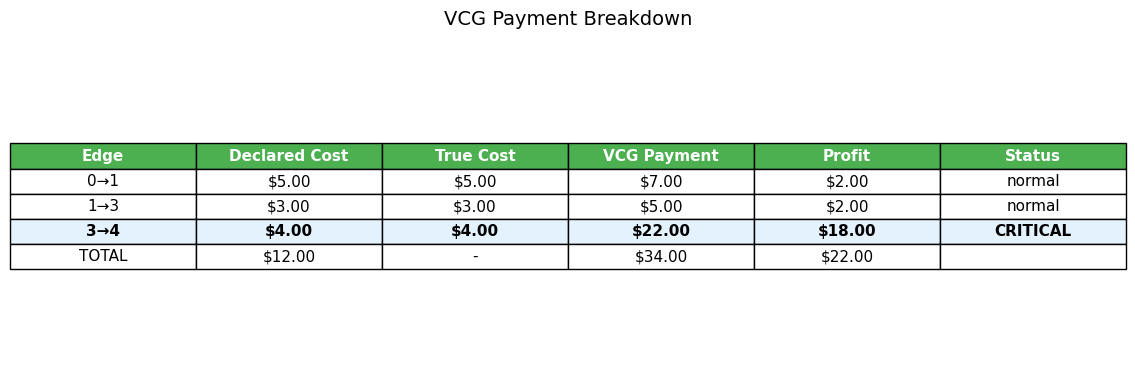

<Figure size 640x480 with 0 Axes>


Testing manipulation of edge 0→1:
Testing edge 0→1:
  True cost: $5.00
  Current declared cost: $5.00
  Current profit: $2.00

Multiplier   Declared     Status       New Profit   Change      
------------------------------------------------------------
🟢  1.2x       $6.00       IN PATH      $2.00       $  +0.00
🟢  1.5x       $7.50       REMOVED      $0.00       $  -2.00
🟢  2.0x       $10.00      REMOVED      $0.00       $  -2.00
🟢  3.0x       $15.00      REMOVED      $0.00       $  -2.00


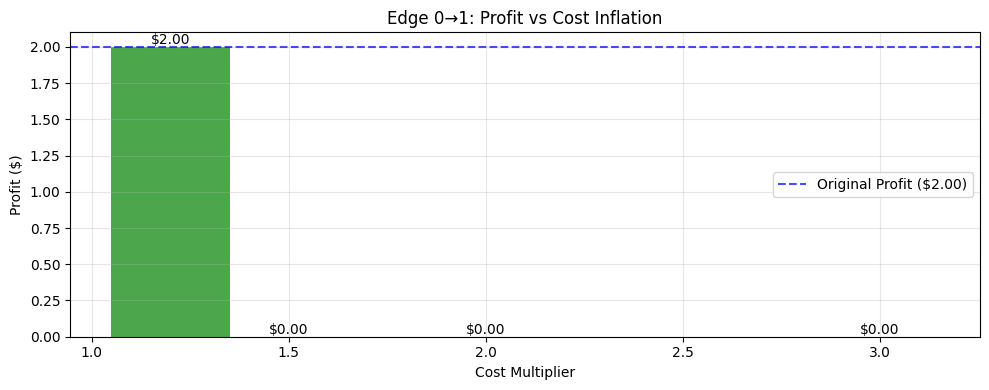

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

class VisualVCG:
    def __init__(self):
        self.graph = nx.DiGraph()
        self.true_costs = {}

    def create_simple_graph(self):
        """Create a simple graph for clear visualization"""
        self.graph = nx.DiGraph()
        self.true_costs = {}

        # Create a simple network with clear alternative paths
        edges = [
            (0, 1, 4), (0, 2, 2),      # From start
            (1, 3, 5), (2, 3, 8),      # Middle layer
            (1, 4, 6), (2, 4, 3),      # Alternative paths
            (3, 5, 2), (4, 5, 4),      # To end
            (3, 6, 7), (4, 6, 5),      # More alternatives
            (5, 7, 3), (6, 7, 4)       # To final destination
        ]

        for u, v, cost in edges:
            self.graph.add_edge(u, v, weight=cost, true_cost=cost)
            self.true_costs[(u, v)] = cost

        return self.graph

    def find_shortest_path(self, source, target):
        """Find shortest path and cost"""
        try:
            path = nx.shortest_path(self.graph, source, target, weight='weight')
            cost = nx.shortest_path_length(self.graph, source, target, weight='weight')
            return path, cost
        except:
            return None, float('inf')

    def compute_payments(self, source, target):
        """Compute VCG payments"""
        path, total_cost = self.find_shortest_path(source, target)
        if not path:
            return {}, None, total_cost

        payments = {}
        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]

        for edge in path_edges:
            u, v = edge
            original_cost = self.graph[u][v]['weight']

            # Remove edge and find alternative cost
            self.graph.remove_edge(u, v)
            try:
                alt_cost = nx.shortest_path_length(self.graph, source, target, weight='weight')
            except:
                alt_cost = float('inf')

            # Restore edge
            self.graph.add_edge(u, v, weight=original_cost, true_cost=self.true_costs[(u, v)])

            # Calculate payment
            if alt_cost == float('inf'):
                payment = sum(data['weight'] for _, _, data in self.graph.edges(data=True))
            else:
                payment = alt_cost - (total_cost - original_cost)

            payment = max(payment, original_cost)
            true_cost = self.true_costs[edge]

            payments[edge] = {
                'declared': original_cost,
                'true': true_cost,
                'payment': payment,
                'profit': payment - true_cost,
                'critical': alt_cost == float('inf')
            }

        return payments, path, total_cost

    def visualize_network(self, source, target, payments, path, total_cost):
        """Create a clear visual representation"""
        plt.figure(figsize=(16, 10))

        # Create layout for better visualization
        pos = nx.spring_layout(self.graph, k=3, iterations=50)

        # Draw the full graph
        nx.draw_networkx_nodes(self.graph, pos, node_size=800, node_color='lightblue',
                              alpha=0.9, edgecolors='black')

        # Draw all edges in light gray
        all_edges = list(self.graph.edges())
        nx.draw_networkx_edges(self.graph, pos, edgelist=all_edges,
                              edge_color='lightgray', width=1, arrows=True,
                              arrowstyle='->', arrowsize=20)

        # Highlight the shortest path in red
        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(self.graph, pos, edgelist=path_edges,
                              edge_color='red', width=3, arrows=True,
                              arrowstyle='->', arrowsize=25)

        # Add edge labels with costs
        edge_labels = {}
        for u, v in self.graph.edges():
            edge_labels[(u, v)] = f"{self.graph[u][v]['weight']:.1f}"

        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels,
                                   font_size=9, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        # Add node labels
        nx.draw_networkx_labels(self.graph, pos, font_size=12, font_weight='bold')

        # Highlight source and target
        nx.draw_networkx_nodes(self.graph, pos, nodelist=[source],
                              node_color='green', node_size=1000)
        nx.draw_networkx_nodes(self.graph, pos, nodelist=[target],
                              node_color='orange', node_size=1000)

        plt.title(f"Network Routing: Shortest Path from {source} to {target}\n"
                 f"Total Path Cost: {total_cost:.2f}", fontsize=14, pad=20)
        plt.axis('off')

        # Create payment visualization table
        self.show_payment_table(payments, total_cost)

        plt.tight_layout()
        plt.show()

    def show_payment_table(self, payments, total_cost):
        """Display payments in a clear table format"""
        if not payments:
            return

        # Create a subplot for the table
        fig, ax = plt.subplots(figsize=(12, 4))
        ax.axis('tight')
        ax.axis('off')

        # Prepare table data
        table_data = []
        total_payment = 0
        total_profit = 0

        for edge, data in payments.items():
            row = [
                f"{edge[0]}→{edge[1]}",
                f"${data['declared']:.2f}",
                f"${data['true']:.2f}",
                f"${data['payment']:.2f}",
                f"${data['profit']:.2f}",
                "CRITICAL" if data['critical'] else "normal"
            ]
            table_data.append(row)
            total_payment += data['payment']
            total_profit += data['profit']

        # Add totals row
        table_data.append(["TOTAL", f"${total_cost:.2f}", "-",
                          f"${total_payment:.2f}", f"${total_profit:.2f}", ""])

        # Create table
        table = ax.table(cellText=table_data,
                        colLabels=["Edge", "Declared Cost", "True Cost",
                                 "VCG Payment", "Profit", "Status"],
                        cellLoc='center',
                        loc='center')

        # Style the table
        table.auto_set_font_size(False)
        table.set_fontsize(11)
        table.scale(1.2, 1.5)

        # Color header row
        for i in range(6):
            table[(0, i)].set_facecolor('#4CAF50')
            table[(0, i)].set_text_props(weight='bold', color='white')

        # Color critical edges
        for i, (edge, data) in enumerate(payments.items(), 1):
            if data['critical']:
                for j in range(6):
                    table[(i, j)].set_facecolor('#FFE0E0')

        # Color totals row
        for i in range(6):
            table[(len(table_data)-1, i)].set_facecolor('#E3F2FD')
            table[(len(table_data)-1, i)].set_text_props(weight='bold')

        plt.title("VCG Payment Breakdown", fontsize=14, pad=20)
        plt.show()

    def demonstrate_single_edge(self, edge, source, target):
        """Show what happens when a specific edge inflates its cost"""
        u, v = edge

        # Get original data
        original_cost = self.graph[u][v]['weight']
        true_cost = self.true_costs[edge]

        # Get original payments to find original profit
        original_payments, _, _ = self.compute_payments(source, target)
        original_profit = original_payments.get(edge, {}).get('profit', 0) if original_payments else 0

        print(f"Testing edge {u}→{v}:")
        print(f"  True cost: ${true_cost:.2f}")
        print(f"  Current declared cost: ${original_cost:.2f}")
        print(f"  Current profit: ${original_profit:.2f}")

        # Test different inflation levels
        results = []
        inflation_levels = [1.2, 1.5, 2.0, 3.0]

        for factor in inflation_levels:
            inflated_cost = true_cost * factor
            self.graph[u][v]['weight'] = inflated_cost

            new_payments, new_path, _ = self.compute_payments(source, target)

            # Check if edge is still in path
            in_path = False
            new_profit = 0
            if new_path:
                path_edges = [(new_path[i], new_path[i+1]) for i in range(len(new_path)-1)]
                in_path = edge in path_edges
                if in_path and edge in new_payments:
                    new_profit = new_payments[edge]['profit']

            profit_change = new_profit - original_profit
            status = "IN PATH" if in_path else "REMOVED"
            result_color = "🟢" if profit_change <= 0 else "🔴"

            results.append({
                'factor': factor,
                'declared': inflated_cost,
                'in_path': in_path,
                'profit': new_profit,
                'change': profit_change,
                'status': status,
                'color': result_color
            })

            # Restore original cost
            self.graph[u][v]['weight'] = original_cost

        # Display results
        print(f"\n{'Multiplier':<12} {'Declared':<12} {'Status':<12} {'New Profit':<12} {'Change':<12}")
        print("-" * 60)
        for result in results:
            print(f"{result['color']} {result['factor']:>4.1f}x{' ':6} ${result['declared']:<10.2f} "
                  f"{result['status']:<12} ${result['profit']:<10.2f} ${result['change']:>+7.2f}")

        # Simple visual
        self.plot_single_edge_results(results, original_profit, edge)

    def plot_single_edge_results(self, results, original_profit, edge):
        """Simple plot for single edge results"""
        plt.figure(figsize=(10, 4))

        factors = [r['factor'] for r in results]
        profits = [r['profit'] for r in results]
        colors = ['red' if p > original_profit + 0.01 else 'green' for p in profits]

        plt.axhline(y=original_profit, color='blue', linestyle='--',
                   label=f'Original Profit (${original_profit:.2f})', alpha=0.7)
        bars = plt.bar(factors, profits, color=colors, alpha=0.7, width=0.3)
        plt.xlabel('Cost Multiplier')
        plt.ylabel('Profit ($)')
        plt.title(f'Edge {edge[0]}→{edge[1]}: Profit vs Cost Inflation')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Add value labels on bars
        for bar, profit in zip(bars, profits):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'${profit:.2f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

def main():
    vcg = VisualVCG()

    # Create and visualize the network
    print("NETWORK ROUTING WITH VCG PAYMENTS")
    print("=" * 50)

    # Create a simple graph
    vcg.create_simple_graph()
    source, target = 0, 7

    # Compute and show payments
    payments, path, total_cost = vcg.compute_payments(source, target)

    if path:
        print(f"Shortest path found: {' → '.join(map(str, path))}")
        print(f"Total path cost: ${total_cost:.2f}")
        print(f"Number of edges in path: {len(path)-1}")

        # Visualize everything
        vcg.visualize_network(source, target, payments, path, total_cost)

        # Test a few specific edges
        print("\n" + "="*60)
        print("TESTING EDGE MANIPULATION")
        print("="*60)

        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]

        # Test first 2 edges in the path
        for i, edge in enumerate(path_edges[:2]):
            print(f"\n--- Testing Edge {edge[0]}→{edge[1]} ---")
            vcg.demonstrate_single_edge(edge, source, target)

    else:
        print("No path exists from source to target!")

# Quick simple version
def quick_demo():
    """A quick demonstration"""
    vcg = VisualVCG()

    # Create minimal graph
    vcg.graph = nx.DiGraph()
    edges = [(0, 1, 5), (0, 2, 8), (1, 3, 3), (2, 3, 2), (3, 4, 4)]

    for u, v, cost in edges:
        vcg.graph.add_edge(u, v, weight=cost, true_cost=cost)
        vcg.true_costs[(u, v)] = cost

    source, target = 0, 4

    print("QUICK VISUAL DEMONSTRATION")
    print("=" * 40)
    payments, path, total_cost = vcg.compute_payments(source, target)

    if path:
        print(f"Path: {' → '.join(map(str, path))}")
        print(f"Cost: ${total_cost:.2f}")

        vcg.visualize_network(source, target, payments, path, total_cost)

        # Test one edge
        if path:
            test_edge = (path[0], path[1])  # First edge in path
            print(f"\nTesting manipulation of edge {test_edge[0]}→{test_edge[1]}:")
            vcg.demonstrate_single_edge(test_edge, source, target)

if __name__ == "__main__":
    main()
    quick_demo()

In [ ]:
import os
import gzip
import networkx as nx
import numpy as np
import random
from typing import Dict, Tuple, List, Optional

def create_from_graph(self, input_graph: nx.DiGraph):
    self.graph = nx.DiGraph()
    self.true_costs = {}
    for u, v, data in input_graph.edges(data=True):
        weight = data.get("weight", 1.0)
        true_cost = data.get("true_cost", weight)
        self.graph.add_edge(u, v, weight=weight, true_cost=true_cost)
        self.true_costs[(u, v)] = true_cost
    print(f"Graph loaded: {len(self.graph.nodes())} nodes, {len(self.graph.edges())} edges.")

VCGShortestPath.create_from_graph = create_from_graph

def test_vcg_on_graph(graph: nx.DiGraph, source, target, title="Test Graph", visualize=True):
    print(f"\n{'='*60}")
    print(f"TESTING VCG ON: {title}")
    print(f"{'='*60}")
    vcg = VCGShortestPath()
    vcg.create_from_graph(graph)
    print(f"Graph: {len(vcg.graph.nodes())} nodes, {len(vcg.graph.edges())} edges")
    payments = vcg.compute_vcg_payments(source, target)
    vcg.display_results(source, target, payments)
    return vcg, payments

local_file = "/content/dns-names.l7.20240113.txt.gz"

print(f"DEBUG: Using manually uploaded CAIDA file.")
print(f"DEBUG: Checking if '{local_file}' exists in current Colab directory...\n")

if not os.path.exists(local_file):
    raise FileNotFoundError(
        f"'{local_file}' not found in /content/. "
        "Please upload your downloaded CAIDA .gz file and rename it as 'caida_dns_topology.txt.gz'"
    )

size = os.path.getsize(local_file)
print(f"DEBUG: Found local file '{local_file}' (size: {size} bytes)")

if size < 1000:
    raise FileNotFoundError(f"Local CAIDA file too small (<1KB). Possibly incomplete upload.")

print("DEBUG: CAIDA DNS-named topology file detected locally.\n")

try:
    with gzip.open(local_file, "rt", encoding="utf-8", errors="ignore") as f_in, open("caida_dns_topology.txt", "w") as f_out:
        for line in f_in:
            f_out.write(line)
    print("Extracted caida_dns_topology.txt successfully.")
except Exception as e:
    print("DEBUG: Error during decompression:", e)
    raise

def load_caida_dns_topology(file_path, max_edges=2000):
    G = nx.DiGraph()
    node_mapping = {}
    node_counter = 0
    with open(file_path, 'r') as f:
        lines = f.readlines()
    all_nodes = set()
    for line in lines:
        if not line.strip() or line.startswith('#'):
            continue
        parts = line.strip().split()
        if len(parts) < 2:
            continue
        u, v = parts[0], parts[1]
        all_nodes.add(u)
        all_nodes.add(v)
    all_nodes = list(all_nodes)
    for i, line in enumerate(lines):
        if i >= max_edges:
            break
        if not line.strip() or line.startswith('#'):
            continue
        parts = line.strip().split()
        if len(parts) < 2:
            continue
        u, v = parts[0], parts[1]
        w = np.random.uniform(1, 15)
        G.add_edge(u, v, weight=w, true_cost=w)
        if i % 3 == 0 and len(all_nodes) > 10:
            intermediate = random.choice(all_nodes)
            if intermediate != u and intermediate != v:
                w1 = np.random.uniform(1, 10)
                w2 = np.random.uniform(1, 10)
                G.add_edge(u, intermediate, weight=w1, true_cost=w1)
                G.add_edge(intermediate, v, weight=w2, true_cost=w2)
    print(f"Loaded CAIDA DNS topology: {len(G.nodes())} nodes, {len(G.edges())} edges.")
    if not nx.is_weakly_connected(G):
        print("Graph is not connected. Using largest weakly connected component.")
        largest_cc = max(nx.weakly_connected_components(G), key=len)
        G = G.subgraph(largest_cc).copy()
        print(f"Using largest component: {len(G.nodes())} nodes, {len(G.edges())} edges.")
    return G

def find_distant_nodes(graph, max_attempts=50):
    if len(graph.nodes()) < 10:
        nodes = list(graph.nodes())
        return nodes[0], nodes[-1]
    nodes = list(graph.nodes())
    best_path = []
    best_pair = (nodes[0], nodes[1])
    for _ in range(max_attempts):
        src, dst = random.sample(nodes, 2)
        try:
            path = nx.shortest_path(graph, source=src, target=dst, weight='weight')
            if len(path) > len(best_path):
                best_path = path
                best_pair = (src, dst)
        except nx.NetworkXNoPath:
            continue
    if len(best_path) > 1:
        print(f"Found path with {len(best_path)} hops: {best_pair}")
        return best_pair
    else:
        return nodes[0], nodes[-1]

try:
    caida_graph = load_caida_dns_topology("caida_dns_topology.txt", max_edges=1500)
    print("\nRunning VCG Mechanism on CAIDA DNS-Named Internet Topology...")
    src, dst = find_distant_nodes(caida_graph)
    print(f"Using source={src}, target={dst}")
    vcg_instance, payments = test_vcg_on_graph(
        caida_graph,
        source=src,
        target=dst,
        title="CAIDA DNS-Named Topology 2024",
        visualize=False
    )
    if payments:
        print(f"\nCAIDA Topology Analysis:")
        undirected_graph = vcg_instance.graph.to_undirected()
        if nx.is_connected(undirected_graph):
            print(f"   - Network diameter: {nx.diameter(undirected_graph)}")
        else:
            print(f"   - Network diameter: Disconnected")
        if nx.is_strongly_connected(vcg_instance.graph):
            print(f"   - Average shortest path length: {nx.average_shortest_path_length(vcg_instance.graph):.2f}")
        else:
            print(f"   - Average shortest path length: Not strongly connected")
        print(f"   - Graph density: {nx.density(vcg_instance.graph):.6f}")
except Exception as e:
    print("Error while running CAIDA experiment:", e)
    import traceback
    traceback.print_exc()


DEBUG: Using manually uploaded CAIDA file.
DEBUG: Checking if '/content/dns-names.l7.20240113.txt.gz' exists in current Colab directory...

DEBUG: Found local file '/content/dns-names.l7.20240113.txt.gz' (size: 46855393 bytes)
DEBUG: CAIDA DNS-named topology file detected locally.

Extracted caida_dns_topology.txt successfully.
Loaded CAIDA DNS topology: 1997 nodes, 2494 edges.
Graph is not connected. Using largest weakly connected component.
Using largest component: 1242 nodes, 1551 edges.

Running VCG Mechanism on CAIDA DNS-Named Internet Topology...
Using source=1705169837, target=213.157.202.22

TESTING VCG ON: CAIDA DNS-Named Topology 2024
Graph loaded: 1242 nodes, 1551 edges.
Graph: 1242 nodes, 1551 edges

Shortest path from 1705169837 to 213.157.202.22:
Path: 1705169837 -> 213.157.202.22
Total declared cost: 4.48

VCG Payments:
----------------------------------------------------------------------
Edge         Declared True     Payment    Profit     Critical  
------------------